<h3><center>Clase ejercicios 02 - IMA539.</center></h3>
<center>Camilo Calfucoy, Jorge Ruíz</center>

<center>Departamento de Ingeniería Matemática</center>

<center>Septiembre 23, 2024.</center>

## Ejercicios propuestos:

1. Cargue la base de datos `Pokemon_DB.csv` en un DataFrame utilizando Pandas.

In [180]:
# Solución
import pandas as pd
df=pd.read_csv("Pokemon_DB.csv")

2. Realice un análisis exploratorio de los datos identificando variables numéricas y categóricas. Si las variables categórica no están definidas como tal, modifique su tipo. 

In [181]:
# Solución
df.info()
df.head(10)
# Nombre es categorica
# Type1 es categorica
# Color es categorica
# Category es categorica
# Speed deberia ser int en vez de object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1203 non-null   object 
 1   Generation  1203 non-null   int64  
 2   Type1       1203 non-null   object 
 3   Height      1203 non-null   float64
 4   Weight      1203 non-null   float64
 5   Color       1203 non-null   object 
 6   Category    1182 non-null   object 
 7   HP          1179 non-null   float64
 8   Attack      1203 non-null   object 
 9   Defense     1203 non-null   int64  
 10  SP_Attack   1203 non-null   int64  
 11  SP_Defense  1203 non-null   int64  
 12  Speed       1203 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 122.3+ KB


,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
0,Bulbasaur,1,Grass,0.7,6.9,Green,Ordinary,45.0,49,49,65,65,45
1,Ivysaur,1,Grass,1.0,13.0,Green,Ordinary,60.0,62,63,80,80,60
2,Venusaur,1,Grass,2.0,100.0,Green,Ordinary,80.0,82,83,100,100,80
3,Mega Venusaur,1,Grass,2.4,155.5,Green,Ordinary,80.0,100,123,122,120,80
4,Charmander,1,Fire,0.6,8.5,Red,Ordinary,39.0,52,43,60,50,65
5,Charmeleon,1,Fire,1.1,19.0,Red,Ordinary,58.0,64,58,80,65,80
6,Charizard,1,Fire,1.7,90.5,Red,Ordinary,78.0,84,78,109,85,100
7,Mega Charizard X,1,Fire,1.7,110.5,Black,Ordinary,78.0,130,111,130,85,100
8,Mega Charizard Y,1,Fire,1.7,100.5,Red,Ordinary,78.0,104,78,159,115,100
9,Squirtle,1,Water,0.5,9.0,Blue,Ordinary,44.0,48,65,50,64,43


3. Limpieza de los datos. Realice las siguientes tareas sucesivamente.

    - Cuántas observaciones faltan por cada variable? 
    - Las filas en las cuales falte el dato de alguna variable categórica deben ser eliminadas.
    - Si faltan datos de una variable numérica estos deben rellenarse con el valor promedio de la variable. 
    - Las variables Attack y Speed tuvieron problemas al ser ingresadas. Revisar cómo pueden rectificarse levemente para que puedan ser convertidas a numéricas.
    - Al final debe quedar cada variable clasificada como categórica o numérica.
    - Estudiar para cada  variable numérica cuántos datos outliers existen de acuerdo a la regla  IQR (outliers son observaciones fuera del intervalo [Q1-1.5*(Q3-Q1),Q3+1.5(Q3-Q1)]). Cuántos datos en total tienen un outlier en alguna variable numérica?
    - Genere otro set de datos donde se eliminar todas las observaciones que contengan algún outlier en sus variables numéricas. Cuántos quedaron finalmente


In [182]:
# Solución
df.isnull().sum()
df["HP"].astype(float)  #Cambio la categoria de HP
# En category hay 21 que son null y 24 de HP son null


0        45.0
1        60.0
2        80.0
3        80.0
4        39.0
        ...  
1198     74.0
1199    100.0
1200    100.0
1201     99.0
1202     90.0
Name: HP, Length: 1203, dtype: float64

In [183]:
df_dropped_null=df.dropna(subset=["Category"]).copy()  #Borro registros
df_dropped_null.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1182 non-null   object 
 1   Generation  1182 non-null   int64  
 2   Type1       1182 non-null   object 
 3   Height      1182 non-null   float64
 4   Weight      1182 non-null   float64
 5   Color       1182 non-null   object 
 6   Category    1182 non-null   object 
 7   HP          1159 non-null   float64
 8   Attack      1182 non-null   object 
 9   Defense     1182 non-null   int64  
 10  SP_Attack   1182 non-null   int64  
 11  SP_Defense  1182 non-null   int64  
 12  Speed       1182 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 129.3+ KB


In [184]:
mean_hp=df_dropped_null["HP"].mean()
df_dropped_null["HP"].fillna(mean_hp,inplace=True)  #Relleno los valores nulos con el promedio
df_dropped_null.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1182 non-null   object 
 1   Generation  1182 non-null   int64  
 2   Type1       1182 non-null   object 
 3   Height      1182 non-null   float64
 4   Weight      1182 non-null   float64
 5   Color       1182 non-null   object 
 6   Category    1182 non-null   object 
 7   HP          1182 non-null   float64
 8   Attack      1182 non-null   object 
 9   Defense     1182 non-null   int64  
 10  SP_Attack   1182 non-null   int64  
 11  SP_Defense  1182 non-null   int64  
 12  Speed       1182 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 129.3+ KB


In [185]:

# df_dropped_null["Attack"].astype(float)
# df_dropped_null["Speed"].astype(float)
sum(df_dropped_null.Attack.apply(lambda x: isinstance(x,str)))

1182

In [186]:
def noesconvertible_a_float(x):
    try:
        y=float(x)
        return False
    except ValueError:
        return True
df_dropped_null.loc[df_dropped_null.Attack.apply(noesconvertible_a_float),"Attack"]
def convierte_a_float(x):
    if x.find("j") !=-1:
        x=x.replace("j","")
    return float(x)
df_dropped_null["Attack"]=df_dropped_null["Attack"].apply(convierte_a_float)
df_dropped_null["Speed"]=df_dropped_null["Speed"].apply(convierte_a_float)
df_dropped_null["Attack"].astype(float)
df_dropped_null["Speed"].astype(float)
df_dropped_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1182 non-null   object 
 1   Generation  1182 non-null   int64  
 2   Type1       1182 non-null   object 
 3   Height      1182 non-null   float64
 4   Weight      1182 non-null   float64
 5   Color       1182 non-null   object 
 6   Category    1182 non-null   object 
 7   HP          1182 non-null   float64
 8   Attack      1182 non-null   float64
 9   Defense     1182 non-null   int64  
 10  SP_Attack   1182 non-null   int64  
 11  SP_Defense  1182 non-null   int64  
 12  Speed       1182 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 129.3+ KB


In [187]:
# [Q1-1.5*(Q3-Q1),Q3+1.5(Q3-Q1)])
quarts = []

for column in df_dropped_null:
    if pd.api.types.is_numeric_dtype(df_dropped_null[column]):  # Verifica si la columna es numérica
        quarts.append({
            column: [df_dropped_null[column].quantile(0.25),
                     df_dropped_null[column].quantile(0.5),
                     df_dropped_null[column].quantile(0.75)]
        })


quarts
outlines=[]
for quart in quarts:
    for column, values in quart.items():
        Q1 = values[0]
        Q3 = values[2]
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior
        outlines.append({
            column: (lower_bound, upper_bound)
        })
outliers=[]
for outline in outlines:
    for column, values in outline.items():
        print(f"Columna {column} \n({values[0]} , {values[1]})")
for limit in outlines:
    for column, (lower_bound, upper_bound) in limit.items():
        outlier_values = df_dropped_null[column].loc[(df_dropped_null[column] < lower_bound) | (df_dropped_null[column] > upper_bound)]
        outliers.append({
            column: outlier_values
        })
for outlier_dict in outliers:
    for column, values in outlier_dict.items():
        print(f"{column} : {len(values)}")  # len(values) para contar el número de outliers
registros_antes_de_borrar=len(df_dropped_null)
for outlier_dict in outliers:
    for column, values in outlier_dict.items():
        # Crear una máscara que sea True en las filas con valores que sean outliers
        mask = df_dropped_null[column].isin(values)
        
        # Eliminar las filas donde la máscara es True (es decir, donde hay outliers)
        df_dropped_null = df_dropped_null[~mask]
print(f"Numero de filas eliminadas {registros_antes_de_borrar-len(df_dropped_null)}")
print(f"Número de filas después de eliminar outliers: {len(df_dropped_null)}")

Columna Generation 
(-3.0 , 13.0)
Columna Height 
(-0.9 , 3.1)
Columna Weight 
(-87.31250000000001 , 168.78750000000002)
Columna HP 
(7.875 , 130.875)
Columna Attack 
(-10.0 , 166.0)
Columna Defense 
(-7.5 , 148.5)
Columna SP_Attack 
(-17.5 , 162.5)
Columna SP_Defense 
(-10.0 , 150.0)
Columna Speed 
(-24.0 , 160.0)
Generation : 0
Height : 56
Weight : 125
HP : 25
Attack : 9
Defense : 23
SP_Attack : 13
SP_Defense : 7
Speed : 2
Numero de filas eliminadas 169
Número de filas después de eliminar outliers: 1013


4. Genere un grafico de tortas que muestre el porcentaje del total de datos
que pertenece a cada clase de la variable `Category` y la cantidad de datos por clase.


Ordinary          938
Semi-Legendary     48
Mythical           22
Legendary           5
Name: Category, dtype: int64


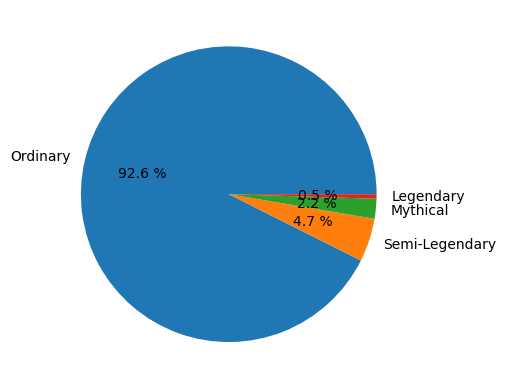

In [188]:
# Solución
import matplotlib.pyplot as plt
categories=df_dropped_null["Category"].unique()
# categories
labels=["Ordinary","Semi-Legendary","Mythical","Legendary"]
quantity_categories=df_dropped_null["Category"].value_counts()
plt.pie(quantity_categories, labels=labels,autopct="%0.1f %%")
print(quantity_categories)


5. Reemplazar la columna `Category` por valores numéricos 


In [189]:
# Solución
df_numeric_categories=df_dropped_null.copy()
df_numeric_categories["Category"].loc[df_numeric_categories["Category"]=="Ordinary"]=0
df_numeric_categories["Category"].loc[df_numeric_categories["Category"]=="Semi-Legendary"]=1
df_numeric_categories["Category"].loc[df_numeric_categories["Category"]=="Legendary"]=2
df_numeric_categories["Category"].loc[df_numeric_categories["Category"]=="Mythical"]=3
df_numeric_categories["Category"].describe(include="all")

C:\Users\newma\AppData\Local\Temp\ipykernel_10440\2203863238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_categories["Category"].loc[df_numeric_categories["Category"]=="Ordinary"]=0
C:\Users\newma\AppData\Local\Temp\ipykernel_10440\2203863238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_categories["Category"].loc[df_numeric_categories["Category"]=="Semi-Legendary"]=1
C:\Users\newma\AppData\Local\Temp\ipykernel_10440\2203863238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

count     1013
unique       4
top          0
freq       938
Name: Category, dtype: int64

6. Encuentre dos variables numéricas que no sean linealmente separable y grafíquelas. 

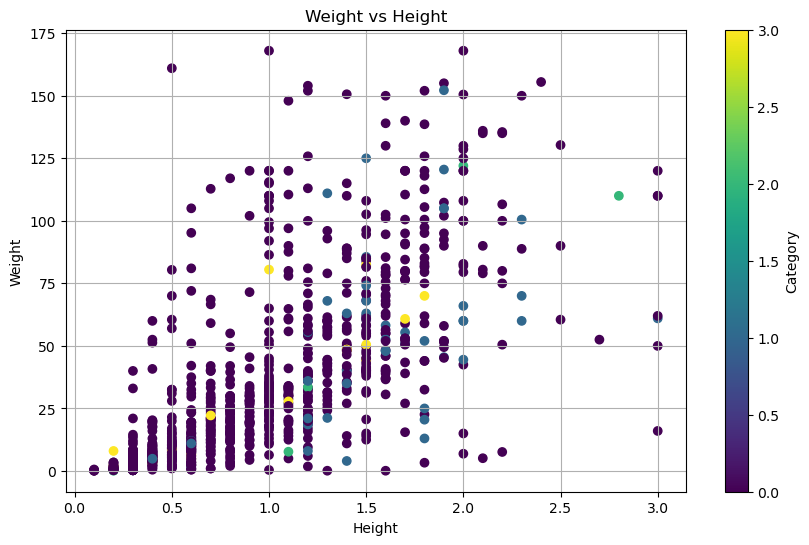

In [190]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Crear una figura y un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Gráfico de dispersión: Weight en función de Height
plt.scatter(df_numeric_categories["Height"], df_numeric_categories["Weight"], c=df_numeric_categories["Category"], cmap='viridis', label='Weight vs Height')

# Etiquetas y título
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height')

# Mostrar la leyenda y la gráfica
plt.colorbar(label='Category')  # Muestra las categorías en la barra de color
plt.grid(True)
plt.show()



7. Genere una matriz `X` que contenga todas las variables numéricas, que utilizaremos para clasificar. Por otra parte en el vector `y` considere la variable objetivo  `Category`.

In [191]:
# Solución
y=df_numeric_categories["Category"].copy()
df_numeric_categories.info()
x=df_numeric_categories.drop(columns=["Name","Type1","Color","Category"]).copy()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1013 non-null   object 
 1   Generation  1013 non-null   int64  
 2   Type1       1013 non-null   object 
 3   Height      1013 non-null   float64
 4   Weight      1013 non-null   float64
 5   Color       1013 non-null   object 
 6   Category    1013 non-null   object 
 7   HP          1013 non-null   float64
 8   Attack      1013 non-null   float64
 9   Defense     1013 non-null   int64  
 10  SP_Attack   1013 non-null   int64  
 11  SP_Defense  1013 non-null   int64  
 12  Speed       1013 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 110.8+ KB


8. Crear un conjunto de entrenamiento utilizando el 70% de los datos y dejar el restante 30% para el conjunto de testeo.

In [192]:
# Solución
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1, stratify=y)


9. Escalar las características de `X` utilizando StandardScaler

In [193]:
# Solución
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


10. Utilizar el conjunto de entrenamiento para entrenar los siguientes tres modelos de clasificacion:
- SVM
- Random Forest
- KNN
Pruebe con varios hyperparámetros para cada modelo.

In [194]:
# Solución
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
    
svm = SVC(kernel='linear', C=100., random_state=1,probability=True)
forest=RandomForestClassifier(criterion='gini', n_estimators=25,random_state=1, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski', n_jobs=-1)
knn.fit(x_train_std,y_train_encoded)
svm.fit(x_train_std, y_train_encoded)
forest.fit(x_train_std,y_train_encoded)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

11. Prediga sobre el conjunto de testeo con los 3 modelos entrenados.

In [195]:
# Solución
y_predicted_svm=svm.predict(x_test_std)
y_predicted_forest=forest.predict(x_test_std)
y_predicted_knn=knn.predict(x_test_std)

12. Evalúa el rendimiento de los tres modelos usando accuracy como métrica. Indique explique que magnitud refleja esta metrica

In [196]:
# Solución
from sklearn.metrics import accuracy_score

# Calcular la precisión de cada modelo
accuracy_svm = accuracy_score(y_test_encoded, y_predicted_svm)
accuracy_forest = accuracy_score(y_test_encoded, y_predicted_forest)
accuracy_knn = accuracy_score(y_test_encoded, y_predicted_knn)

# Imprimir los resultados
print(f"Precisión SVM: {accuracy_svm}")
print(f"Precisión Random Forest: {accuracy_forest}")
print(f"Precisión KNN: {accuracy_knn}")

Precisión SVM: 0.9473684210526315
Precisión Random Forest: 0.9342105263157895
Precisión KNN: 0.9243421052631579


13. Escoja el mejor modelo y en genere dos gráficos de torta indicando las proporciones de clases. Un gráfico basado en las clases predichas por el modelo  sobre el conjunto de testeo y otro con las clases reales del test.

0    281
1     14
3      7
2      2
dtype: int64
0    289
1     10
3      5
dtype: int64


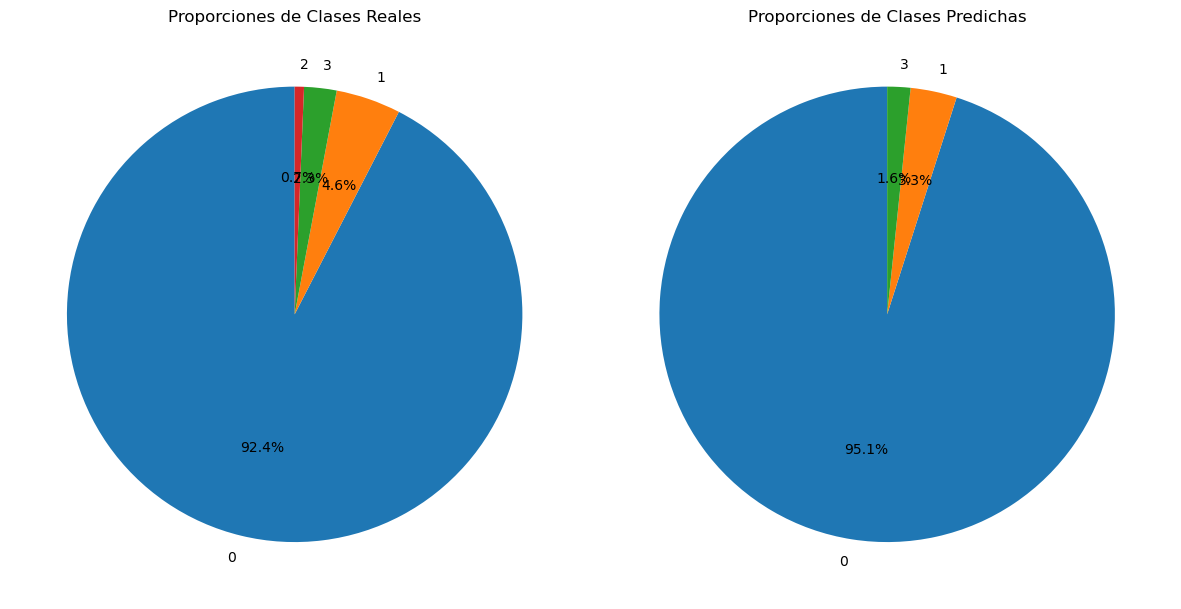

In [197]:
# Solución
# Contar las ocurrencias de cada clase en el conjunto de prueba real
class_counts_real = pd.Series(y_test_encoded).value_counts()

# Contar las ocurrencias de cada clase en las predicciones del mejor modelo
class_counts_pred = pd.Series(best_model_predictions).value_counts()

# Obtener las etiquetas dinámicamente de los índices de los conteos
labels_real = class_counts_real.index
labels_pred = class_counts_pred.index

# Gráfico de torta para las clases reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(class_counts_real, labels=labels_real, autopct='%1.1f%%', startangle=90)
plt.title('Proporciones de Clases Reales')

# Gráfico de torta para las clases 
print(class_counts_real)
print(class_counts_pred)
plt.subplot(1, 2, 2)
plt.pie(class_counts_pred, labels=labels_pred, autopct='%1.1f%%', startangle=90)
plt.title('Proporciones de Clases Predichas')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

14. Cómo cambian los resultados si se utilizan los datos que contienen aún los outliers?